## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Ingesting Dataset

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking INFO and NULLs

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
## no NULL values

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Data Cleaning

In [9]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [13]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
df['bmi'].value_counts()

bmi
32.300    13
28.310     9
30.800     8
31.350     8
30.495     8
          ..
20.350     1
31.240     1
19.095     1
22.100     1
21.280     1
Name: count, Length: 548, dtype: int64

In [16]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [17]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
## Data looks clean already

## Data Analysis

### ~ Checking the Numeric Columns

<Axes: >

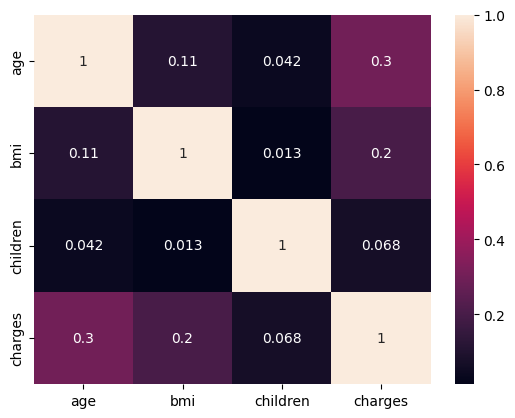

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [23]:
## Age, BMI, Children --> order of precedence

In [24]:
## Age and charges are positively correlated by 0.3
## BMI and charges are +vely correlated by 0.2
## children and charges are +vely correlated by 0.068

### ~ Checking the non-numeric columns

In [25]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [28]:
df.groupby('sex')['charges'].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

## Almost equal charges for both male and female

In [30]:
df.groupby('children')['charges'].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [31]:
df.groupby('smoker')['charges'].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

### If the person is a smoker then the Insurance Charges are 4 times higher compared to non-smoker

In [33]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

### SouthEast has higher Insurance average when compared to others

In [56]:
df.where(df['smoker']=='no').groupby(['age','smoker'])['charges'].mean().sort_values()

age   smoker
22.0  no         2551.017880
18.0  no         3215.162259
19.0  no         3536.712898
20.0  no         3673.112925
21.0  no         3813.530413
26.0  no         4166.516168
31.0  no         4579.078773
30.0  no         5266.642757
32.0  no         5271.314955
25.0  no         5547.187943
24.0  no         5587.430232
36.0  no         5637.339524
27.0  no         5800.976874
23.0  no         5980.978162
28.0  no         6016.296050
38.0  no         6295.582554
29.0  no         6324.360341
33.0  no         6846.031349
34.0  no         6944.390933
42.0  no         7025.590108
35.0  no         7117.045069
41.0  no         7231.203194
39.0  no         7893.445625
37.0  no         7995.078430
40.0  no         8171.216649
44.0  no         9142.108500
46.0  no         9317.204284
45.0  no         9534.540580
43.0  no         9559.484349
51.0  no         9819.143996
49.0  no        10189.160885
47.0  no        10405.286887
48.0  no        11195.560182
56.0  no        11563.926564
5

In [60]:
df.loc[(df['age']==49) & (df['smoker']=='no')].sort_values(by='charges')

,age,sex,bmi,children,smoker,region,charges
171,49,male,30.300,0,no,southwest,8116.68000
313,49,male,35.860,0,no,southeast,8124.40840
903,49,male,36.850,0,no,southeast,8125.78450
118,49,female,27.170,0,no,southeast,8601.32930
900,49,male,22.515,0,no,northeast,8688.85885
666,49,male,28.700,1,no,southwest,8703.45600
1106,49,female,29.925,0,no,northwest,8988.15875
622,49,female,21.300,1,no,southwest,9182.17000
269,49,male,25.840,1,no,northeast,9282.48060
1052,49,male,29.830,1,no,northeast,9288.02670


In [131]:
df['age'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0


In [152]:
age_grp = []
for i in df['age']:
    if i <= 20:
        age_grp.append('<= 20')
    elif 20<i<=30:
        age_grp.append('21 to 30')
    elif 30<i<=40:
        age_grp.append('31 to 40')
    elif 40<i<=50:
        age_grp.append('41 to 50')
    elif 50<i<=65:
        age_grp.append('51 to 65')

In [153]:
df['age_grp'] = age_grp

In [154]:
df.groupby(['age_grp','smoker'])['charges'].mean().sort_values()

age_grp   smoker
<= 20     no         3413.875214
21 to 30  no         5062.087910
31 to 40  no         6631.046417
41 to 50  no         9622.055472
51 to 65  no        13540.277993
<= 20     yes       25971.177649
21 to 30  yes       28612.348469
31 to 40  yes       30466.664836
41 to 50  yes       33391.834441
51 to 65  yes       38820.223082
Name: charges, dtype: float64

In [155]:
df['bmi'].describe().reset_index().transpose()

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
bmi,1338.0,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13


In [156]:
bmi_grp = []
for i in df['bmi']:
    if i < 18.5:
        bmi_grp.append('Underweight')
    elif 18.5<=i<25:
        bmi_grp.append('Normal')
    elif 25<=i<30:
        bmi_grp.append('Overweight')
    elif 30<=i:
        bmi_grp.append('Obese')

In [157]:
df['bmi_grp'] = bmi_grp

In [160]:
df.groupby(['age_grp'])['charges'].mean().sort_values()

age_grp
<= 20        8713.482413
21 to 30     9806.025289
31 to 40    11639.308653
41 to 50    14782.043077
51 to 65    18084.987223
Name: charges, dtype: float64

In [165]:
df.groupby(['age_grp','smoker'])['charges'].mean().reset_index().sort_values(by='age_grp')

,age_grp,smoker,charges
0,21 to 30,no,5062.087910
1,21 to 30,yes,28612.348469
2,31 to 40,no,6631.046417
3,31 to 40,yes,30466.664836
4,41 to 50,no,9622.055472
5,41 to 50,yes,33391.834441
6,51 to 65,no,13540.277993
7,51 to 65,yes,38820.223082
8,<= 20,no,3413.875214
9,<= 20,yes,25971.177649


In [161]:
df.groupby(['bmi_grp'])['charges'].mean().sort_values()

bmi_grp
Underweight     8852.200585
Normal         10409.337709
Overweight     10987.509891
Obese          15552.335469
Name: charges, dtype: float64

In [169]:
df.groupby(['bmi_grp','smoker'])['charges'].mean()

bmi_grp      smoker
Normal       no         7685.656014
             yes       19942.223641
Obese        no         8842.691548
             yes       41557.989840
Overweight   no         8257.961955
             yes       22495.874163
Underweight  no         5532.992453
             yes       18809.824980
Name: charges, dtype: float64

In [176]:
bmi_smok = []
for i,j in zip(df['bmi_grp'],df['smoker']):
    if (i=='Obese') and (j=='yes'):
        bmi_smok.append(1)
    else:
        bmi_smok.append(0)

In [177]:
df['obs_smok'] = bmi_smok

In [178]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_grp,bmi_grp,obs_smok
0,19,female,27.900,0,yes,southwest,16884.92400,<= 20,Overweight,0
1,18,male,33.770,1,no,southeast,1725.55230,<= 20,Obese,0
2,28,male,33.000,3,no,southeast,4449.46200,21 to 30,Obese,0
3,33,male,22.705,0,no,northwest,21984.47061,31 to 40,Normal,0
4,32,male,28.880,0,no,northwest,3866.85520,31 to 40,Overweight,0


In [179]:
df['obs_smok'].value_counts()

obs_smok
0    1193
1     145
Name: count, dtype: int64

In [180]:
df.groupby('obs_smok')['charges'].mean()

obs_smok
0     9832.285385
1    41557.989840
Name: charges, dtype: float64

In [162]:
df.groupby(['age','bmi_grp'])['charges'].mean().sort_values()

age  bmi_grp    
19   Underweight     1674.562600
22   Overweight      2152.479607
19   Normal          2621.916274
23   Underweight     2775.192150
21   Underweight     2876.362425
                        ...     
61   Overweight     25301.445652
37   Obese          25558.499925
64   Normal         28043.682223
60   Obese          28945.323263
32   Underweight    32734.186300
Name: charges, Length: 157, dtype: float64

In [158]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_grp,bmi_grp
0,19,female,27.900,0,yes,southwest,16884.92400,<= 20,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,<= 20,Obese
2,28,male,33.000,3,no,southeast,4449.46200,21 to 30,Obese
3,33,male,22.705,0,no,northwest,21984.47061,31 to 40,Normal
4,32,male,28.880,0,no,northwest,3866.85520,31 to 40,Overweight


In [63]:
df.groupby(['sex','smoker'])['charges'].mean().sort_values()

sex     smoker
male    no         8087.204731
female  no         8762.297300
        yes       30678.996276
male    yes       33042.005975
Name: charges, dtype: float64

In [66]:
df.where(df['smoker']=='no').groupby(['age','bmi','smoker'])['charges'].mean().sort_values()

age   bmi     smoker
18.0  23.210  no         1121.87390
      30.140  no         1131.50660
      33.330  no         1135.94070
      33.660  no         1136.39940
      34.100  no         1137.01100
                           ...     
44.0  29.735  no        32108.66282
52.0  37.525  no        33471.97189
55.0  26.800  no        35160.13457
61.0  33.330  no        36580.28216
59.0  34.800  no        36910.60803
Name: charges, Length: 1037, dtype: float64

In [69]:
df.groupby(['age','children','smoker'])['charges'].mean().sort_values()

age  children  smoker
20   0         no         2005.195171
22   0         no         2198.097878
19   0         no         2276.324474
     1         no         2364.350545
23   1         no         2604.814937
                             ...     
57   1         yes       48675.517700
45   0         yes       48831.123805
28   1         yes       51194.559140
31   1         yes       58571.074480
54   0         yes       63770.428010
Name: charges, Length: 358, dtype: float64

## ML Model

### Importing ML Libraries

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [182]:
## Data copy

In [183]:
ml = df.copy()

In [184]:
ml.head()

,age,sex,bmi,children,smoker,region,charges,age_grp,bmi_grp,obs_smok
0,19,female,27.900,0,yes,southwest,16884.92400,<= 20,Overweight,0
1,18,male,33.770,1,no,southeast,1725.55230,<= 20,Obese,0
2,28,male,33.000,3,no,southeast,4449.46200,21 to 30,Obese,0
3,33,male,22.705,0,no,northwest,21984.47061,31 to 40,Normal,0
4,32,male,28.880,0,no,northwest,3866.85520,31 to 40,Overweight,0


## Data Preprocessing

In [185]:
le = LabelEncoder()
ml['sex'] = le.fit_transform(ml['sex'])

In [187]:
oe_smok = OrdinalEncoder(categories=[['no','yes']])
ml['smoker'] = oe_smok.fit_transform(ml[['smoker']])

In [188]:
le_reg = LabelEncoder()
ml['region'] = le_reg.fit_transform(ml['region'])

In [191]:
le_age = LabelEncoder()
ml['age_grp'] = le_age.fit_transform(ml['age_grp'])

In [192]:
oe_bmi = OrdinalEncoder(categories=[['Underweight', 'Normal', 'Overweight', 'Obese']])
ml['bmi_grp'] = oe_bmi.fit_transform(ml[['bmi_grp']])

In [193]:
ml.head()

,age,sex,bmi,children,smoker,region,charges,age_grp,bmi_grp,obs_smok
0,19,0,27.900,0,1.0,3,16884.92400,4,2.0,0
1,18,1,33.770,1,0.0,2,1725.55230,4,3.0,0
2,28,1,33.000,3,0.0,2,4449.46200,0,3.0,0
3,33,1,22.705,0,0.0,1,21984.47061,1,1.0,0
4,32,1,28.880,0,0.0,1,3866.85520,1,2.0,0


In [194]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
 7   age_grp   1338 non-null   int64  
 8   bmi_grp   1338 non-null   float64
 9   obs_smok  1338 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 104.7 KB


## Train Test Split

In [195]:
x = ml.drop(columns='charges')
y = ml[['charges']]

In [196]:
x.head()

,age,sex,bmi,children,smoker,region,age_grp,bmi_grp,obs_smok
0,19,0,27.900,0,1.0,3,4,2.0,0
1,18,1,33.770,1,0.0,2,4,3.0,0
2,28,1,33.000,3,0.0,2,0,3.0,0
3,33,1,22.705,0,0.0,1,1,1.0,0
4,32,1,28.880,0,0.0,1,1,2.0,0


In [197]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [198]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.05, random_state=42)

## ML Model Usage

### Linear Regression

#### Before

In [104]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_preds = lr.predict(xtest)
lr_r2 = r2_score(ytest, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(ytest, lr_preds))
lr_mae = mean_absolute_error(ytest, lr_preds)

print('r2: ', lr_r2)
print('rmse: ', lr_rmse)
print('mae: ', lr_mae)

r2:  0.8110732903658374
rmse:  5455.656189916372
mae:  3887.357995738273


#### After

In [201]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_preds = lr.predict(xtest)
lr_r2 = r2_score(ytest, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(ytest, lr_preds))
lr_mae = mean_absolute_error(ytest, lr_preds)

print('r2: ', lr_r2)
print('rmse: ', lr_rmse)
print('mae: ', lr_mae)

r2:  0.8895906470338
rmse:  4170.645199807048
mae:  2266.47212474888


### K-Nearest Neighbour Regressor

#### Before

In [107]:
knn = KNeighborsRegressor()
knn.fit(xtrain, ytrain)
knn_preds = knn.predict(xtest)
knn_r2 = r2_score(ytest, knn_preds)
knn_rmse = np.sqrt(mean_squared_error(ytest, knn_preds))
knn_mae = mean_absolute_error(ytest, knn_preds)

print('r2: ', knn_r2)
print('rmse: ', knn_rmse)
print('mae: ', knn_mae)

r2:  0.23818732217461214
rmse:  10955.303439226684
mae:  8138.693277134327


#### After

In [203]:
knn = KNeighborsRegressor()
knn.fit(xtrain, ytrain)
knn_preds = knn.predict(xtest)
knn_r2 = r2_score(ytest, knn_preds)
knn_rmse = np.sqrt(mean_squared_error(ytest, knn_preds))
knn_mae = mean_absolute_error(ytest, knn_preds)

print('r2: ', knn_r2)
print('rmse: ', knn_rmse)
print('mae: ', knn_mae)

r2:  0.4158759921135844
rmse:  9592.964591190368
mae:  6847.096655223881


### Decision Tree Regressor

#### Before

In [118]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(xtrain, ytrain)
dt_preds = dt.predict(xtest)
dt_r2 = r2_score(ytest, dt_preds)
dt_rmse = np.sqrt(mean_squared_error(ytest, dt_preds))
dt_mae = mean_absolute_error(ytest, dt_preds)

print('r2: ', dt_r2)
print('rmse: ', dt_rmse)
print('mae: ', dt_mae)

r2:  0.8209894124008752
rmse:  5310.55208036293
mae:  2228.3794647014925


#### After

In [204]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(xtrain, ytrain)
dt_preds = dt.predict(xtest)
dt_r2 = r2_score(ytest, dt_preds)
dt_rmse = np.sqrt(mean_squared_error(ytest, dt_preds))
dt_mae = mean_absolute_error(ytest, dt_preds)

print('r2: ', dt_r2)
print('rmse: ', dt_rmse)
print('mae: ', dt_mae)

r2:  0.7926716387907082
rmse:  5715.176810164695
mae:  2560.2980150000003


### Random Forest Regressor

#### Before

In [119]:
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)
rf_preds = rf.predict(xtest)
rf_r2 = r2_score(ytest, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(ytest, rf_preds))
rf_mae = mean_absolute_error(ytest, rf_preds)

print('r2: ', rf_r2)
print('rmse: ', rf_rmse)
print('mae: ', rf_mae)

C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r2:  0.8595666644300682
rmse:  4703.654555469595
mae:  2299.8651523903227


#### After

In [205]:
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)
rf_preds = rf.predict(xtest)
rf_r2 = r2_score(ytest, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(ytest, rf_preds))
rf_mae = mean_absolute_error(ytest, rf_preds)

print('r2: ', rf_r2)
print('rmse: ', rf_rmse)
print('mae: ', rf_mae)

C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r2:  0.8594628890057239
rmse:  4705.392154317134
mae:  2261.313154203805


### AdaBoost Regressor

#### Before

In [120]:
ad = AdaBoostRegressor(random_state=42)
ad.fit(xtrain, ytrain)
ad_preds = ad.predict(xtest)
ad_r2 = r2_score(ytest, ad_preds)
ad_rmse = np.sqrt(mean_squared_error(ytest, ad_preds))
ad_mae = mean_absolute_error(ytest, ad_preds)

print('r2: ', ad_r2)
print('rmse: ', ad_rmse)
print('mae: ', ad_mae)

r2:  0.8535257718828869
rmse:  4803.755804808
mae:  3759.9959851575236


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### After

In [206]:
ad = AdaBoostRegressor(random_state=42)
ad.fit(xtrain, ytrain)
ad_preds = ad.predict(xtest)
ad_r2 = r2_score(ytest, ad_preds)
ad_rmse = np.sqrt(mean_squared_error(ytest, ad_preds))
ad_mae = mean_absolute_error(ytest, ad_preds)

print('r2: ', ad_r2)
print('rmse: ', ad_rmse)
print('mae: ', ad_mae)

r2:  0.8026669480050468
rmse:  5575.710670201907
mae:  4820.92746662055


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Bagging Regressor

#### Before

In [121]:
bg = BaggingRegressor(random_state=42)
bg.fit(xtrain, ytrain)
bg_preds = bg.predict(xtest)
bg_r2 = r2_score(ytest, bg_preds)
bg_rmse = np.sqrt(mean_squared_error(ytest, bg_preds))
bg_mae = mean_absolute_error(ytest, bg_preds)

print('r2: ', bg_r2)
print('rmse: ', bg_rmse)
print('mae: ', bg_mae)

r2:  0.8546562664437007
rmse:  4785.182097500294
mae:  2434.4539284751245


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\ensemble\_bagging.py:583: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


#### After

In [207]:
bg = BaggingRegressor(random_state=42)
bg.fit(xtrain, ytrain)
bg_preds = bg.predict(xtest)
bg_r2 = r2_score(ytest, bg_preds)
bg_rmse = np.sqrt(mean_squared_error(ytest, bg_preds))
bg_mae = mean_absolute_error(ytest, bg_preds)

print('r2: ', bg_r2)
print('rmse: ', bg_rmse)
print('mae: ', bg_mae)

r2:  0.8593142949627113
rmse:  4707.879072247367
mae:  2389.4657615796023


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\ensemble\_bagging.py:583: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


### Gradient Boost Regressor

#### Before

In [122]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(xtrain, ytrain)
gb_preds = gb.predict(xtest)
gb_r2 = r2_score(ytest, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(ytest, gb_preds))
gb_mae = mean_absolute_error(ytest, gb_preds)

print('r2: ', gb_r2)
print('rmse: ', gb_rmse)
print('mae: ', gb_mae)

r2:  0.8789753263552891
rmse:  4366.538295173201
mae:  2323.9146802282708


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


#### After

In [208]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(xtrain, ytrain)
gb_preds = gb.predict(xtest)
gb_r2 = r2_score(ytest, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(ytest, gb_preds))
gb_mae = mean_absolute_error(ytest, gb_preds)

print('r2: ', gb_r2)
print('rmse: ', gb_rmse)
print('mae: ', gb_mae)

r2:  0.8829246925934272
rmse:  4294.701329210784
mae:  2233.6454567026694


C:\Users\Sharan Kalyan\Anaconda3\envs\mons_py313\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


### CatBoost Regressor

#### Before

In [123]:
cb = CatBoostRegressor(random_state=42)
cb.fit(xtrain, ytrain)
cb_preds = cb.predict(xtest)
cb_r2 = r2_score(ytest, cb_preds)
cb_rmse = np.sqrt(mean_squared_error(ytest, cb_preds))
cb_mae = mean_absolute_error(ytest, cb_preds)

print('r2: ', cb_r2)
print('rmse: ', cb_rmse)
print('mae: ', cb_mae)

Learning rate set to 0.042524
0:	learn: 11692.3230228	total: 1.28ms	remaining: 1.28s
1:	learn: 11328.0540142	total: 2.29ms	remaining: 1.14s
2:	learn: 10986.5461105	total: 3.34ms	remaining: 1.11s
3:	learn: 10663.4280575	total: 4.3ms	remaining: 1.07s
4:	learn: 10369.0619181	total: 5.28ms	remaining: 1.05s
5:	learn: 10052.7012688	total: 6.1ms	remaining: 1.01s
6:	learn: 9742.5182028	total: 7.11ms	remaining: 1.01s
7:	learn: 9469.0785813	total: 8.1ms	remaining: 1s
8:	learn: 9185.4484286	total: 9.1ms	remaining: 1s
9:	learn: 8924.6891117	total: 9.81ms	remaining: 972ms
10:	learn: 8692.2262757	total: 10.9ms	remaining: 980ms
11:	learn: 8453.5725774	total: 11.9ms	remaining: 980ms
12:	learn: 8228.8862222	total: 12.8ms	remaining: 976ms
13:	learn: 8018.3684869	total: 13.8ms	remaining: 973ms
14:	learn: 7818.4176571	total: 14.8ms	remaining: 975ms
15:	learn: 7668.8325613	total: 15.2ms	remaining: 934ms
16:	learn: 7483.0003256	total: 16.3ms	remaining: 940ms
17:	learn: 7317.3587818	total: 16.8ms	remaining: 

#### After

In [209]:
cb = CatBoostRegressor(random_state=42)
cb.fit(xtrain, ytrain)
cb_preds = cb.predict(xtest)
cb_r2 = r2_score(ytest, cb_preds)
cb_rmse = np.sqrt(mean_squared_error(ytest, cb_preds))
cb_mae = mean_absolute_error(ytest, cb_preds)

print('r2: ', cb_r2)
print('rmse: ', cb_rmse)
print('mae: ', cb_mae)

Learning rate set to 0.042524
0:	learn: 11678.5761358	total: 1.69ms	remaining: 1.69s
1:	learn: 11291.5043774	total: 2.78ms	remaining: 1.39s
2:	learn: 10939.0496865	total: 3.83ms	remaining: 1.27s
3:	learn: 10602.1177880	total: 4.44ms	remaining: 1.1s
4:	learn: 10277.7680134	total: 5.48ms	remaining: 1.09s
5:	learn: 9974.1188606	total: 6.46ms	remaining: 1.07s
6:	learn: 9662.0189460	total: 7.44ms	remaining: 1.05s
7:	learn: 9388.8748562	total: 7.86ms	remaining: 974ms
8:	learn: 9129.6202163	total: 8.85ms	remaining: 975ms
9:	learn: 8872.1215942	total: 9.87ms	remaining: 978ms
10:	learn: 8637.4154597	total: 10.9ms	remaining: 980ms
11:	learn: 8398.4308452	total: 11.9ms	remaining: 982ms
12:	learn: 8178.3444056	total: 13ms	remaining: 983ms
13:	learn: 7966.0300871	total: 13.9ms	remaining: 979ms
14:	learn: 7757.4091605	total: 14.9ms	remaining: 977ms
15:	learn: 7563.6238839	total: 15.9ms	remaining: 978ms
16:	learn: 7390.0269570	total: 16.9ms	remaining: 978ms
17:	learn: 7211.0245990	total: 17.7ms	remai

### XGB Regressor

#### Before

In [124]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
xgb_preds = xgb.predict(xtest)
xgb_r2 = r2_score(ytest, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(ytest, xgb_preds))
xgb_mae = mean_absolute_error(ytest, xgb_preds)

print('r2: ', xgb_r2)
print('rmse: ', xgb_rmse)
print('mae: ', xgb_mae)

r2:  0.8725962042808533
rmse:  4480.139506756458
mae:  2250.503173828125


#### After

In [210]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)
xgb_preds = xgb.predict(xtest)
xgb_r2 = r2_score(ytest, xgb_preds)
xgb_rmse = np.sqrt(mean_squared_error(ytest, xgb_preds))
xgb_mae = mean_absolute_error(ytest, xgb_preds)

print('r2: ', xgb_r2)
print('rmse: ', xgb_rmse)
print('mae: ', xgb_mae)

r2:  0.8386931419372559
rmse:  5041.11674135801
mae:  2721.349609375


### XGBRF Regressor

#### Before

In [125]:
xgbrf = XGBRFRegressor()
xgbrf.fit(xtrain, ytrain)
xgbrf_preds = xgbrf.predict(xtest)
xgbrf_r2 = r2_score(ytest, xgbrf_preds)
xgbrf_rmse = np.sqrt(mean_squared_error(ytest, xgbrf_preds))
xgbrf_mae = mean_absolute_error(ytest, xgbrf_preds)

print('r2: ', xgbrf_r2)
print('rmse: ', xgbrf_rmse)
print('mae: ', xgbrf_mae)

r2:  0.8766112923622131
rmse:  4408.979473755803
mae:  2338.837158203125


#### After

In [212]:
xgbrf = XGBRFRegressor()
xgbrf.fit(xtrain, ytrain)
xgbrf_preds = xgbrf.predict(xtest)
xgbrf_r2 = r2_score(ytest, xgbrf_preds)
xgbrf_rmse = np.sqrt(mean_squared_error(ytest, xgbrf_preds))
xgbrf_mae = mean_absolute_error(ytest, xgbrf_preds)

print('r2: ', xgbrf_r2)
print('rmse: ', xgbrf_rmse)
print('mae: ', xgbrf_mae)

r2:  0.8742425441741943
rmse:  4451.097842105923
mae:  2350.239990234375


### LGBM Regressor

#### Before

In [126]:
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(xtrain, ytrain)
lgbm_preds = lgbm.predict(xtest)
lgbm_r2 = r2_score(ytest, lgbm_preds)
lgbm_rmse = np.sqrt(mean_squared_error(ytest, lgbm_preds))
lgbm_mae = mean_absolute_error(ytest, lgbm_preds)

print('r2: ', lgbm_r2)
print('rmse: ', lgbm_rmse)
print('mae: ', lgbm_mae)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1271, number of used features: 6
[LightGBM] [Info] Start training from score 13245.226843
r2:  0.876379010781239
rmse:  4413.126947506072
mae:  2337.0040125704822


#### After

In [213]:
xgbrf = XGBRFRegressor()
xgbrf.fit(xtrain, ytrain)
xgbrf_preds = xgbrf.predict(xtest)
xgbrf_r2 = r2_score(ytest, xgbrf_preds)
xgbrf_rmse = np.sqrt(mean_squared_error(ytest, xgbrf_preds))
xgbrf_mae = mean_absolute_error(ytest, xgbrf_preds)

print('r2: ', xgbrf_r2)
print('rmse: ', xgbrf_rmse)
print('mae: ', xgbrf_mae)

r2:  0.8742425441741943
rmse:  4451.097842105923
mae:  2350.239990234375


## Gradient Boost Regressor, XGBRF, LGBM, Cat Boost, XGB

In [82]:
ml.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1.0,3,16884.92400
1,18,1,33.770,1,0.0,2,1725.55230
2,28,1,33.000,3,0.0,2,4449.46200
3,33,1,22.705,0,0.0,1,21984.47061
4,32,1,28.880,0,0.0,1,3866.85520


In [50]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
